In [12]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

In [8]:
#Loading and Preprocessing the dataset
train_df=pd.read_csv('D:\carrie works\help\Sign-Language-Detection\sign_mnist_train.csv')
test_df=pd.read_csv('D:\carrie works\help\Sign-Language-Detection\sign_mnist_test.csv')
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [9]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [10]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [17]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()


(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [14]:
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [18]:
X_test=X_test.values.reshape(-1,28,28,1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

Text(0.5, 1.0, 'label: 16  letter: Q')

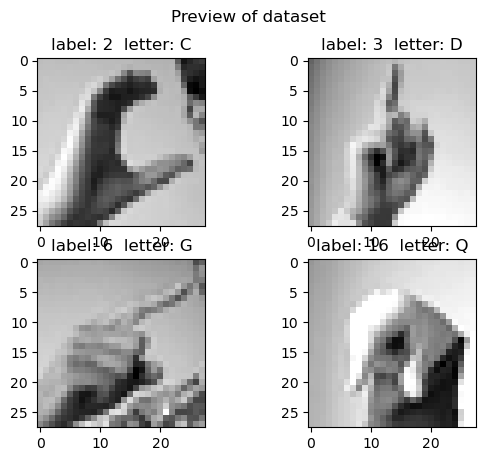

In [34]:
#Visualization of the Dataset

fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 2  letter: C')
axe[0,1].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 3  letter: D')
axe[1,0].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 6  letter: G')
axe[1,1].imshow(X_train[5].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 16  letter: Q')

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of each label')

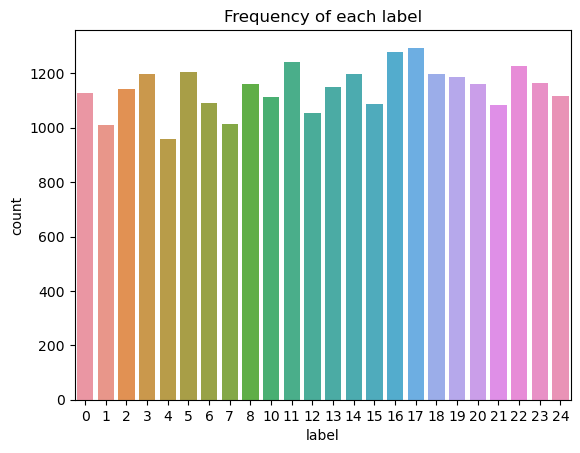

In [24]:
sns.countplot(train_label)
plt.title("Frequency of each label")

In [36]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [37]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 59s 397ms/step - loss: 2.9940 - accuracy: 0.1031 - val_loss: 2.3073 - val_accuracy: 0.2687
Epoch 2/35
138/138 [==============================] - 54s 390ms/step - loss: 2.1864 - accuracy: 0.3056 - val_loss: 1.4265 - val_accuracy: 0.5414
Epoch 3/35
138/138 [==============================] - 54s 387ms/step - loss: 1.6480 - accuracy: 0.4580 - val_loss: 1.1195 - val_accuracy: 0.6072
Epoch 4/35
138/138 [==============================] - 50s 363ms/step - loss: 1.3181 - accuracy: 0.5635 - val_loss: 0.8360 - val_accuracy: 0.7097
Epoch 5/35
138/138 [==============================] - 55s 398ms/step - loss: 1.1196 - accuracy: 0.6269 - val_loss: 0.7761 - val_accuracy: 0.7469
Epoch 6/35
138/138 [==============================] - 54s 391ms/step - loss: 0.9535 - accuracy: 0.6812 - val_loss: 0.5524 - val_accuracy: 0.8052
Epoch 7/35
138/138 [==============================] - 55s 395ms/step - loss: 0.8132 - accuracy: 0.7270 - val_loss: 0.4774 - val_ac

In [40]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 2s 10ms/step - loss: 0.0367 - accuracy: 0.9879


In [41]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 98.78695011138916%


In [44]:
model.save('smnist.h5')